## Business Case

we try to predict the damage for the buildings if it has earthquake based on the data of buildings that affected by the earthquake

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
target=pd.read_csv('train_labels.csv')

In [3]:
target.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
train=pd.read_csv('train_values.csv')

In [5]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
damage=target["damage_grade"]

In [110]:
damage

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [7]:
data=train.join(damage)

In [8]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


lets do some analysis with the features to consider the most realted features to the damage grade(our target) and ignore the others

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

<AxesSubplot:xlabel='age', ylabel='damage_grade'>

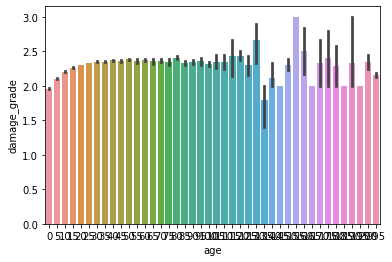

In [15]:
sns.barplot(x='age', y= 'damage_grade', data=data)

it is so far the average level of damage in all agaes

<AxesSubplot:xlabel='geo_level_1_id', ylabel='damage_grade'>

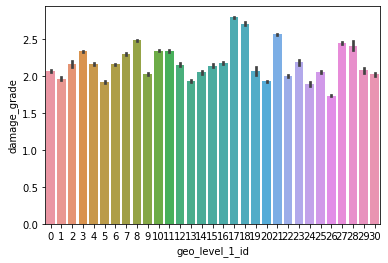

In [16]:
sns.barplot(x='geo_level_1_id', y= 'damage_grade', data=data)

the same for the geo level_id_1, as all grades of damage are seems to be on average also with the difference in geo_level_id_1

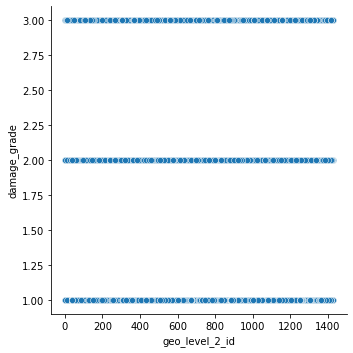

In [22]:
sns.relplot(x='geo_level_2_id', y= 'damage_grade', data=data)

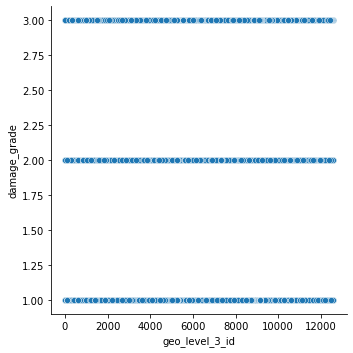

In [24]:
sns.relplot(x='geo_level_3_id', y= 'damage_grade', data=data)

it is obvious that the geo level doesnt have any pattern in change with the damage level, so we will put in the lowest priority during our analysis

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='damage_grade'>

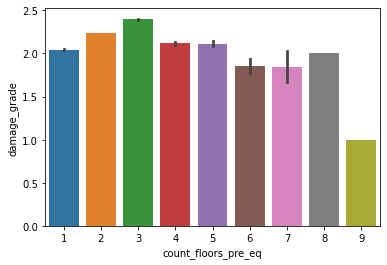

In [25]:
sns.barplot(x='count_floors_pre_eq', y= 'damage_grade', data=data)

from the previous figure, it is shown that the number of building doesnt affect also the grade of damage, as in the max number doesnt has the max damage or vice versa, so we cant put it in any relation with the damage grade of buildings 

<AxesSubplot:xlabel='area_percentage', ylabel='damage_grade'>

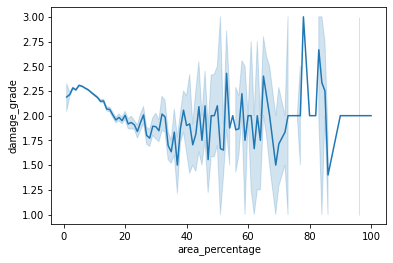

In [28]:
sns.lineplot(x='area_percentage', y= 'damage_grade', data=data)

the area of building and damage also have no pattern to follow, as it is change randomly with any behaviour to study 

<AxesSubplot:xlabel='height_percentage', ylabel='damage_grade'>

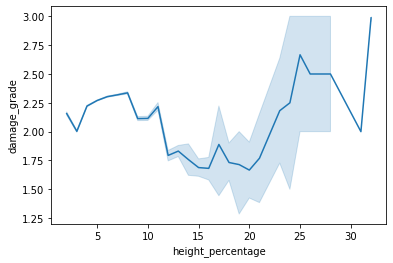

In [29]:
sns.lineplot(x='height_percentage', y= 'damage_grade', data=data)

<AxesSubplot:xlabel='land_surface_condition', ylabel='damage_grade'>

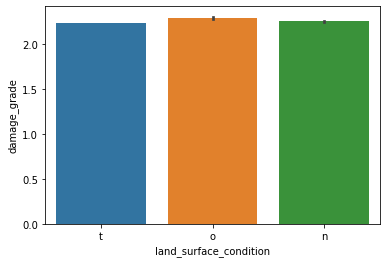

In [31]:
sns.barplot(x='land_surface_condition', y= 'damage_grade', data=data)

it is shown that  the surface condition has no direct relation with the surface condition as all the types has the same damage level, but we have to consider it as maybe with other features can make change

<AxesSubplot:xlabel='foundation_type', ylabel='damage_grade'>

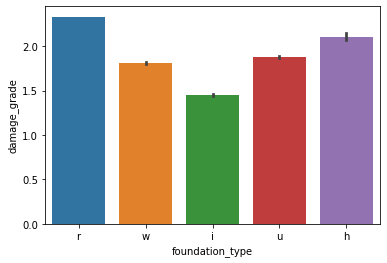

In [32]:
sns.barplot(x='foundation_type', y= 'damage_grade', data=data)

we can see from the graph that the least damage grade is type 'i' , then other ones, so we have to consider it in our analysis

<AxesSubplot:xlabel='roof_type', ylabel='damage_grade'>

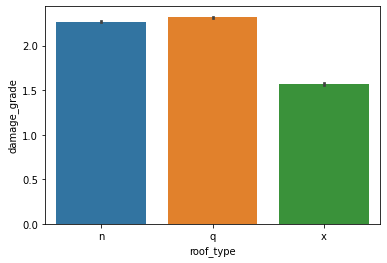

In [33]:
sns.barplot(x='roof_type', y= 'damage_grade', data=data)

<AxesSubplot:xlabel='ground_floor_type', ylabel='damage_grade'>

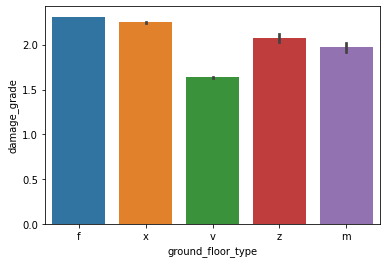

In [39]:
sns.barplot(x='ground_floor_type', y= 'damage_grade', data=data)

<AxesSubplot:xlabel='other_floor_type', ylabel='damage_grade'>

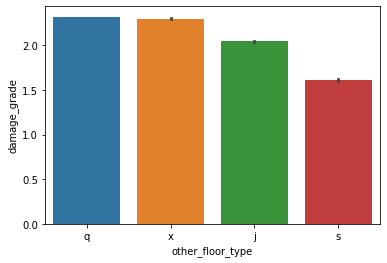

In [35]:
sns.barplot(x='other_floor_type', y= 'damage_grade', data=data)

<AxesSubplot:xlabel='plan_configuration', ylabel='damage_grade'>

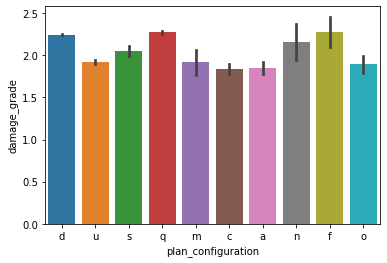

In [37]:
sns.barplot(x='plan_configuration', y= 'damage_grade', data=data)

we can say it is medium effect for the previous effect such as (roof_type,ground_floor_type,other_floor_type,plan_configuration), as there some types are the same, but maybe one or two types is lowesr than the rest, but not with high difference, so we can consider it in low priority

<AxesSubplot:xlabel='position', ylabel='damage_grade'>

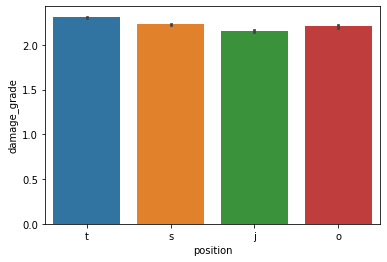

In [38]:
sns.barplot(x='position', y= 'damage_grade', data=data)

the position as it is showed in the graph has no effect on the damage but considering it with other features in the model maybe leads to better results 

In [10]:
def conditions(s):
    if (s['has_superstructure_adobe_mud'] == 1):
        return 'mud'
    elif (s['has_superstructure_mud_mortar_stone'] == 1):
         return 'mud_mortar'
    elif s['has_superstructure_stone_flag'] == 1:
        return 'stone'
    elif s['has_superstructure_cement_mortar_stone'] == 1:
        return 'mortar_stone'
    elif s['has_superstructure_mud_mortar_brick'] == 1:
        return 'mortar_brick'
    elif s['has_superstructure_cement_mortar_brick'] == 1:
        return 'cement_brick'
    elif s['has_superstructure_timber'] == 1:
        return 'timber'
    elif s['has_superstructure_bamboo'] == 1:
        return 'bamboo'
    elif s['has_superstructure_rc_non_engineered'] == 1:
        return 'rc_eng'
    elif s['has_superstructure_other'] == 1:
        return 'other'
    
    
    else:
        return 'non_defined'

In [11]:
data['super_structure'] = data.apply(conditions, axis=1)

In [12]:
data.super_structure.unique()

array(['mud', 'mud_mortar', 'cement_brick', 'stone', 'timber', 'rc_eng',
       'mortar_brick', 'non_defined', 'mortar_stone', 'bamboo', 'other'],
      dtype=object)

<AxesSubplot:xlabel='super_structure', ylabel='damage_grade'>

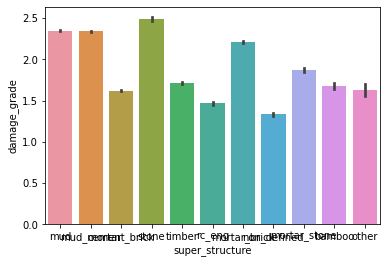

In [80]:
sns.barplot(x='super_structure', y= 'damage_grade', data=data)

it seems that the type of structure of building lead to interesting results, as there is types with high damage grade, others with low, so we have to consider this in our model to focus on that feature to follow the behaviour of it to avoide the types that have high damage levels

<AxesSubplot:xlabel='legal_ownership_status', ylabel='damage_grade'>

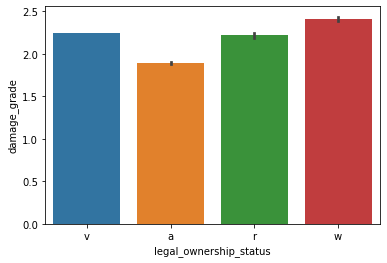

In [81]:
sns.barplot(x='legal_ownership_status', y= 'damage_grade', data=data)

as expected that is no relation between the legal ownership and level of the damage for the building, but it may affect if the ownership with other aspects, it good to consider it in the model also

<AxesSubplot:xlabel='count_families', ylabel='damage_grade'>

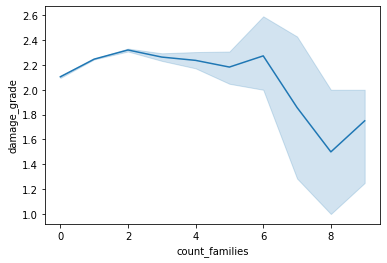

In [83]:
sns.lineplot(x='count_families', y= 'damage_grade', data=data)

from the line relationship between the no. of families and level of damage, has no fixed pattern, so it cant be consider as strong variable in affecting the prediction of level of the damage

<AxesSubplot:xlabel='has_secondary_use', ylabel='damage_grade'>

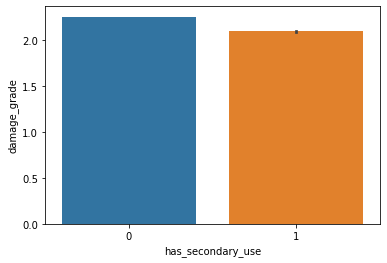

In [85]:
sns.barplot(x='has_secondary_use', y= 'damage_grade', data=data)

the secondary use has no effect on the damage also, but lets see if the secondary use in specific type may affect the level of damage

In [13]:
def sec_uses(s):
    if (s['has_secondary_use_agriculture'] == 1):
        return 'agr'
    elif (s['has_secondary_use_hotel'] == 1):
         return 'hotel'
    elif s['has_secondary_use_rental'] == 1:
        return 'rent'
    elif s['has_secondary_use_institution'] == 1:
        return 'inst'
    elif s['has_secondary_use_school'] == 1:
        return 'school'
    elif s['has_secondary_use_industry'] == 1:
        return 'industry'
    elif s['has_secondary_use_gov_office'] == 1:
        return 'gov'
    elif s['has_secondary_use_use_police'] == 1:
        return 'police'
    elif s['has_secondary_use_other'] == 1:
        return 'other'
    
    
    else:
        return 'non_defined'

In [14]:
data['sec_use'] = data.apply(sec_uses, axis=1)

In [16]:
data.sec_use.unique()

array(['non_defined', 'agr', 'rent', 'hotel', 'industry', 'other',
       'school', 'inst', 'police', 'gov'], dtype=object)

<AxesSubplot:xlabel='sec_use', ylabel='damage_grade'>

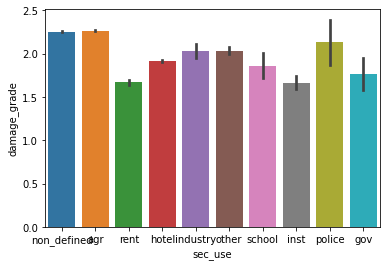

In [92]:
sns.barplot(x='sec_use', y= 'damage_grade', data=data)

the usage of our building may affect on the ability of facing damage, that what previous graph shows, as according to the type of secondary usage the building has been affected towards parameter like level of damage in earthquake

to create the model taking into consideration the features above, we have to convert each categorical varaible into int
so we will first do the preprocessing on the features that we selected, which are : 
1-foundation type
2-super structure type
3-secondary usage
4-roof type
5-ground floor type
6-other floors type
7-plan configuration
in the same order of priority


## feature Preprocessing

In [93]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

## Feature labeling

In [17]:
data.foundation_type.unique()

array(['r', 'w', 'i', 'u', 'h'], dtype=object)

In [18]:
data.foundation_type=data.foundation_type.map({'r':1,'w':2,'i':3, 'u':4,'h':5 })

In [19]:
data.foundation_type.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [20]:
data.super_structure.unique()

array(['mud', 'mud_mortar', 'cement_brick', 'stone', 'timber', 'rc_eng',
       'mortar_brick', 'non_defined', 'mortar_stone', 'bamboo', 'other'],
      dtype=object)

In [21]:
data.super_structure=data.super_structure.map({'mud':1,'mud_mortar':2,'cement_brick':3, 'stone':4,'timber':5,'rc_eng':6,'mortar_brick':7, 'non_defined':8, 'mortar_stone':9, 'bamboo':10, 'other':11 })

In [22]:
data.super_structure.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [23]:
data. sec_use.unique()

array(['non_defined', 'agr', 'rent', 'hotel', 'industry', 'other',
       'school', 'inst', 'police', 'gov'], dtype=object)

In [24]:
data.sec_use=data.sec_use.map({'non_defined':1, 'agr':2, 'rent':3, 'hotel':4, 'industry':5, 'other':6,
       'school':7, 'inst':8, 'police':9, 'gov':10 })

In [25]:
data. sec_use.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [26]:
data.roof_type.unique()

array(['n', 'q', 'x'], dtype=object)

In [27]:
data.roof_type=data.roof_type.map({'n':1,'q':2,'x':3 })

In [28]:
data.roof_type.unique()

array([1, 2, 3], dtype=int64)

In [29]:
data. ground_floor_type.unique()

array(['f', 'x', 'v', 'z', 'm'], dtype=object)

In [30]:
data.ground_floor_type=data.ground_floor_type.map({'f':1,'x':2,'v':3, 'z':4,'m':5 })

In [31]:
data. ground_floor_type.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [32]:
data.other_floor_type.unique()

array(['q', 'x', 'j', 's'], dtype=object)

In [33]:
data.other_floor_type=data.other_floor_type.map({'q':1,'x':2,'j':3, 's':4 })

In [34]:
data.plan_configuration.unique()

array(['d', 'u', 's', 'q', 'm', 'c', 'a', 'n', 'f', 'o'], dtype=object)

In [35]:
data.plan_configuration=data.plan_configuration.map({'d':1, 'u':2, 's':3, 'q':4, 'm':5,  'c':6,
       'a':7, 'n':8,  'f':9, 'o':10 })

In [36]:
data.plan_configuration.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [39]:
data.land_surface_condition.unique()

array(['t', 'o', 'n'], dtype=object)

In [40]:
data.land_surface_condition=data.land_surface_condition.map({'t':1,'o':2,'n':3 })

In [41]:
data.land_surface_condition.unique()

array([1, 2, 3], dtype=int64)

In [42]:
data.position.unique()

array(['t', 's', 'j', 'o'], dtype=object)

In [43]:
data.position=data.position.map({'t':1, 's':2,'j':3, 'o':4 })

In [44]:
data.position.unique()

array([1, 2, 3, 4], dtype=int64)

In [45]:
data.legal_ownership_status.unique()

array(['v', 'a', 'r', 'w'], dtype=object)

In [46]:
data.legal_ownership_status=data.legal_ownership_status.map({'v':1, 'a':2,'r':3, 'w':4 })

In [47]:
data.legal_ownership_status.unique()

array([1, 2, 3, 4], dtype=int64)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int64
 9   foundation_type                         260601 non-null  int64
 10  roof_type                               260601 non-null  int64
 11  

now we are ready to create the model and see the result of the consideration of our features that were selected:
    

## Model creation

In [49]:
#1- create the variables x,y
X=data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition','legal_ownership_status','position','sec_use','super_structure','foundation_type','roof_type','ground_floor_type','other_floor_type','plan_configuration']]

In [50]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,legal_ownership_status,position,sec_use,super_structure,foundation_type,roof_type,ground_floor_type,other_floor_type,plan_configuration
0,6,487,12198,2,30,6,5,1,1,1,1,1,1,1,1,1,1
1,8,900,2812,2,10,8,7,2,1,2,1,2,1,1,2,1,1
2,21,363,8973,2,10,5,5,1,1,1,1,2,1,1,1,2,1
3,22,418,10694,2,10,6,5,1,1,2,1,2,1,1,1,2,1
4,11,131,1488,3,30,8,9,1,1,2,1,1,1,1,1,2,1


In [52]:
X.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   geo_level_1_id          260601 non-null  int64
 1   geo_level_2_id          260601 non-null  int64
 2   geo_level_3_id          260601 non-null  int64
 3   count_floors_pre_eq     260601 non-null  int64
 4   age                     260601 non-null  int64
 5   area_percentage         260601 non-null  int64
 6   height_percentage       260601 non-null  int64
 7   land_surface_condition  260601 non-null  int64
 8   legal_ownership_status  260601 non-null  int64
 9   position                260601 non-null  int64
 10  sec_use                 260601 non-null  int64
 11  super_structure         260601 non-null  int64
 12  foundation_type         260601 non-null  int64
 13  roof_type               260601 non-null  int64
 14  ground_floor_type       260601 non-null  int64
 15  

In [53]:
Y=data['damage_grade']

In [54]:
Y.head()

0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: int64

<AxesSubplot:>

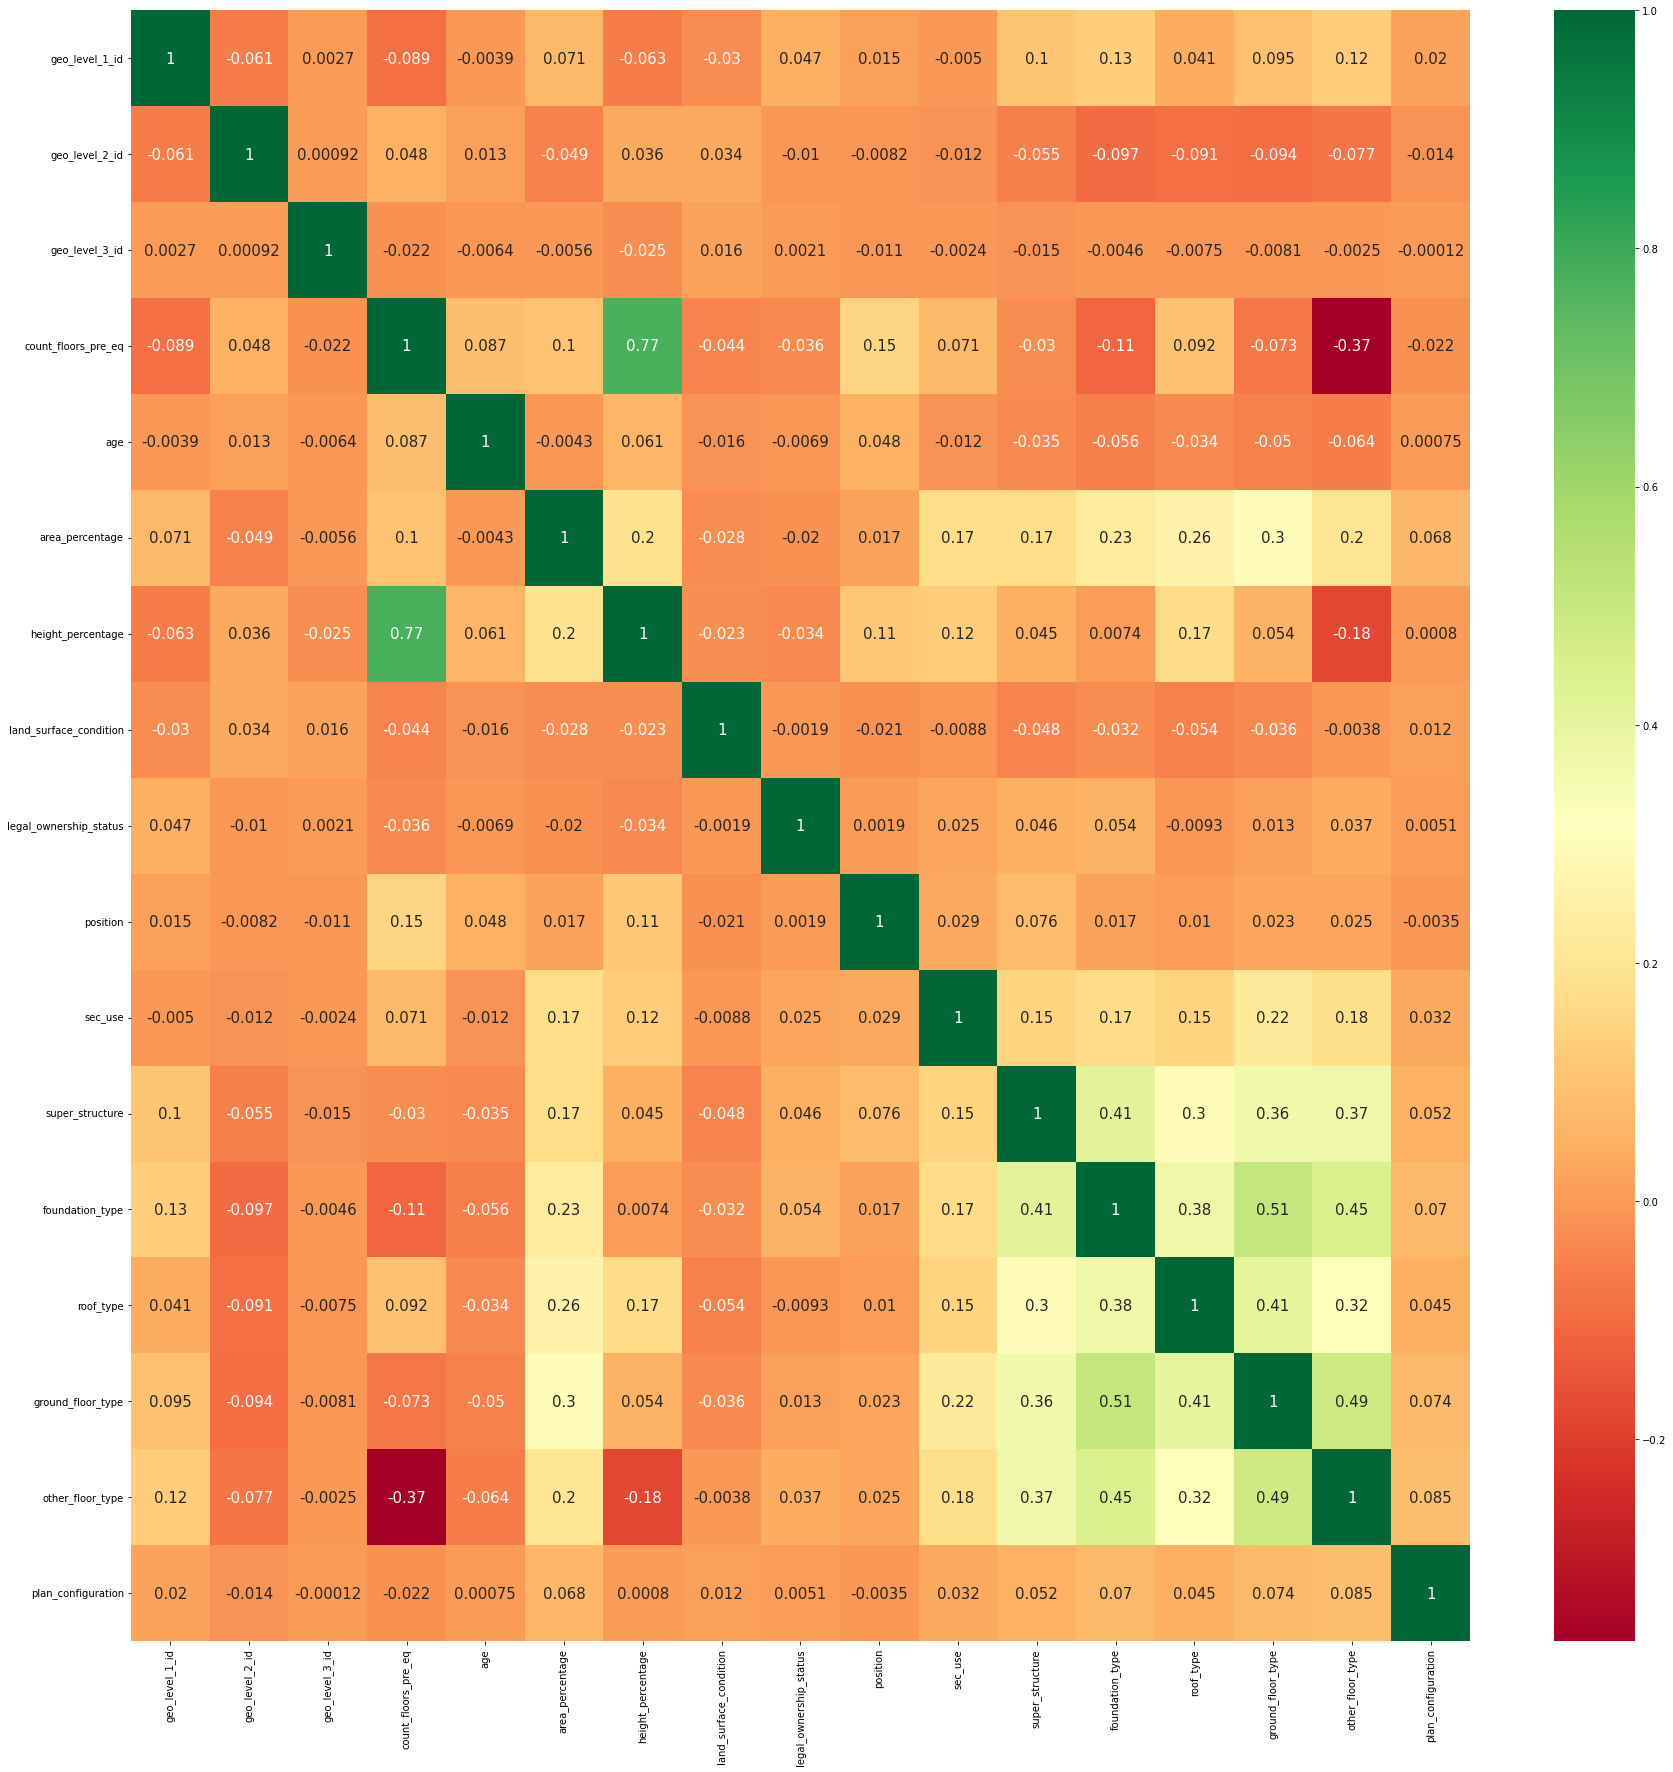

In [55]:
## Checking correlation

plt.figure(figsize=(30, 30))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [57]:
#splitting the train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

In [81]:
#create the model 
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_hat=dt.predict(X_test)

ValueError: Number of labels=195450 does not match number of samples=333582

## Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score

In [61]:
train_predict=dt.predict(X_train)
cc_train=accuracy_score(Y_train,train_predict)
cc_train

0.9838014837554362

In [62]:
y_hat=dt.predict(X_test)

In [63]:
cc_test=accuracy_score(Y_test,y_hat)
cc_test

0.6528372549922488

In [64]:
print(classification_report(Y_test,y_hat))

              precision    recall  f1-score   support

           1       0.49      0.51      0.50      6347
           2       0.71      0.70      0.71     36994
           3       0.61      0.61      0.61     21810

    accuracy                           0.65     65151
   macro avg       0.60      0.61      0.60     65151
weighted avg       0.65      0.65      0.65     65151



In [65]:
accuracy_score= accuracy_score(Y_test,y_hat)

In [66]:
accuracy_score

0.6528372549922488

In [82]:
#from the previous results, the accuracy can be better, so we will apply SMOTE to get balancing data and accuracy improved

In [67]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [69]:
print(Counter(Y))

Counter({2: 148259, 3: 87218, 1: 25124})


In [71]:
x_sm,y_sm=sm.fit_resample(X,Y)

In [72]:
Counter(y_sm)

Counter({3: 148259, 2: 148259, 1: 148259})

In [73]:

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=42)

In [74]:
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)

In [77]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99    111401
           2       0.98      0.99      0.98    111111
           3       0.99      0.98      0.99    111070

    accuracy                           0.99    333582
   macro avg       0.99      0.99      0.99    333582
weighted avg       0.99      0.99      0.99    333582



In [83]:
#now the model has been trained well 

In [78]:
y_hat=dt.predict(X_test)

In [80]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.85      0.88      0.86     36858
           2       0.68      0.66      0.67     37148
           3       0.73      0.73      0.73     37189

    accuracy                           0.76    111195
   macro avg       0.75      0.76      0.76    111195
weighted avg       0.75      0.76      0.75    111195



the accuracy has been improved with almost 10 %, which is very good for such models 